## Importing primary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing machine learning libraries

In [2]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

## Importing Dataset

In [3]:
data = pd.read_csv('heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Certain categorical variables, such as cp (chest pain), thal, and ca, have been converted into dummy variables
Some numerical variables like age, chol, trestbps, thalach and oldpeak will require normalization

## Creating dummy variables out of categorical variables

In [5]:
data = pd.get_dummies(data, columns = ['sex','cp','fbs', 'restecg','exang','slope',
                        'ca','thal'])

## Standardizing numerical variables

In [6]:
standardScaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [7]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [8]:
data.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [9]:
# Converting boolean columns to int
columns_to_int = ['sex_0','sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
                   'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
                   'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
                   'thal_2', 'thal_3']
data[columns_to_int] = data[columns_to_int].astype('int64')

In [10]:
data.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


## Creating training and test datasets

In [11]:
y = data['target']
X = data.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Using the Decision Tree Model

### Finding best parameters for model

In [12]:
dt_scores = []
cr_scores = []
for cr in ['gini', 'entropy']:
    for i in range(1, len(X.columns) + 1):
        dt_classifier = DecisionTreeClassifier(criterion = cr, max_features = i, random_state = 69)
        dt_classifier.fit(X_train, y_train)
        dt_scores.append(dt_classifier.score(X_test, y_test))
    print(f'Best max features for {cr}: {np.argmax(dt_scores)+1}')
    cr_scores.append(dt_scores[np.argmax(dt_scores)])
print(f'Best criterion: {"gini" if not np.argmax(cr_scores) else "entropy"}')

Best max features for gini: 29
Best max features for entropy: 29
Best criterion: gini


### Testing the model

In [13]:
dt_classifier = DecisionTreeClassifier(criterion = 'gini', max_features = 29, random_state = 69)
dt_classifier.fit(X_train, y_train)
print(f'Accuracy: {dt_classifier.score(X_test, y_test)}')

Accuracy: 0.8852459016393442


## Using the Random Forest Model

### Finding best parameters for model

In [14]:
rf_param_grid = {
    'n_estimators': range(1,1000,10)
    }
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(param_distributions = rf_param_grid, estimator = rf,
                              scoring = "accuracy", verbose = 0, n_iter = 100, cv = 4)
rf_random.fit(X_train, y_train)
best_params = rf_random.best_params_
print(f' Best parameters: {best_params}')

 Best parameters: {'n_estimators': 101}


### Finding the accuracy of the model

In [15]:
rf_random.score(X_test, y_test)

0.8524590163934426

### Ranking features from least to most influential

<Axes: ylabel='feature'>

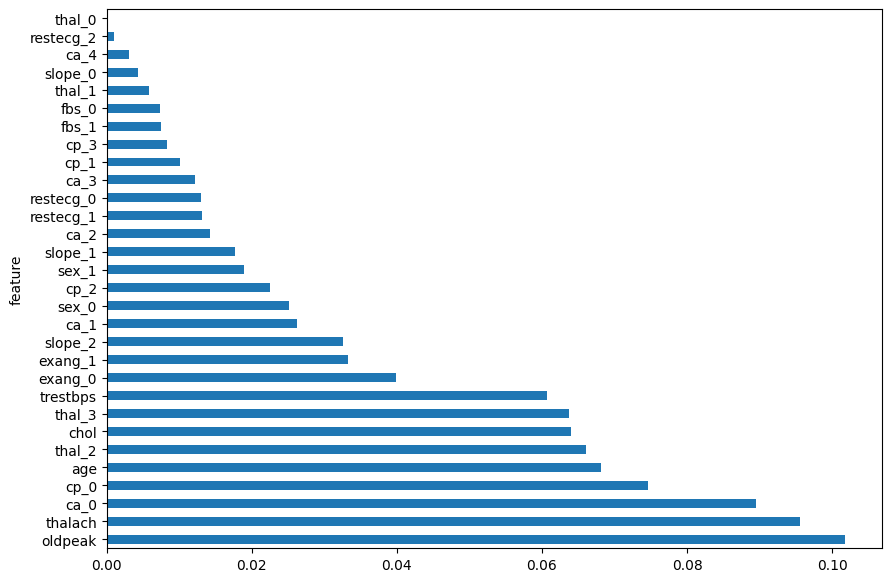

In [16]:
def feature_imp(df,model):
    fi = pd.DataFrame(columns = ['feature', 'importance'])
    fi['feature'] = df.columns
    fi['importance'] = model.best_estimator_.feature_importances_
    return fi.sort_values(by = 'importance', ascending = False)
feature_imp(X_train, rf_random).plot('feature', 'importance', 'barh', figsize = (10,7), legend = False)

From this chart, we can see that cp_0 (Chest Pain) is the most influential feature from the dataset.

## Using the K Neighbors Classifier Model

For this model, it did not accept dataframes so I had to convert the training and testing datasets to arrays for them to be used properly in the model

In [17]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

### Finding best parameters for model

In [18]:
knn_scores = []
for k in range(1,40):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train_np, y_train_np)
    knn_scores.append(knn_classifier.score(X_test_np, y_test_np))
print(f'Best choice of k: {np.argmax(knn_scores)+1}')

Best choice of k: 8


### Testing the model

In [19]:
k=8
knn_classifier = KNeighborsClassifier(n_neighbors = k)
knn_classifier.fit(X_train_np, y_train_np)
y_pred = knn_classifier.predict(X_test_np)
print(f'Accuracy: {np.sum(y_pred == y_test_np)/len(y_test)}')

Accuracy: 0.9180327868852459


## Using Support Vector Machine Model

### Finding best parameters for SV Classifier

In [20]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_scores_c = []
    for ch in range(1,11):
        if kernels[i] == 'poly':
            svc_scores_poly=[]
            for d in range(3,10):
                svc_classifier = SVC(kernel = kernels[i], C = ch, degree = d)
                svc_classifier.fit(X_train, y_train)
                svc_scores_poly.append(svc_classifier.score(X_test, y_test))
            print(f' Best polynomial score: {np.argmax(svc_scores_poly)+3}')
            svc_scores_c.append(svc_scores_poly[np.argmax(svc_scores_poly)])
        else:
            svc_classifier = SVC(kernel = kernels[i], C = ch)
            svc_classifier.fit(X_train, y_train)
            svc_scores_c.append(svc_classifier.score(X_test, y_test))
    print(f'Best choice of c for {kernels[i]}: {np.argmax(svc_scores_c)+1}')
    svc_scores.append(svc_scores_c[np.argmax(svc_scores_c)])
print(f'Best choice of k: {kernels[np.argmax(svc_scores)]}')

Best choice of c for linear: 1
 Best polynomial score: 5
 Best polynomial score: 5
 Best polynomial score: 6
 Best polynomial score: 3
 Best polynomial score: 7
 Best polynomial score: 7
 Best polynomial score: 7
 Best polynomial score: 7
 Best polynomial score: 7
 Best polynomial score: 7
Best choice of c for poly: 1
Best choice of c for rbf: 1
Best choice of c for sigmoid: 1
Best choice of k: rbf


### Testing the model

In [21]:
svc_classifier = SVC(kernel = 'rbf', C=1)
svc_classifier.fit(X_train, y_train)
print(f'Accuracy: {svc_classifier.score(X_test,y_test)}')

Accuracy: 0.9016393442622951


## Testing Artificial Neural Networks with Tensorflow and Keras

In [22]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dropout

In [23]:
model = tf.keras.Sequential([
    layers.Dense(20, activation = 'relu', name = 'dense1'),
    Dropout(0.2),
    layers.Dense(20, activation = 'relu', name = 'dense2'),
    layers.Dense(20, activation = 'relu', name = 'dense3'),
    Dropout(0.5),
    layers.Dense(20, activation = 'relu', name = 'dense4'),
    layers.Dense(20, activation = 'sigmoid', name = 'fcl'),
])

In [24]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

In [25]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100, verbose = 2)
model.evaluate(X_test, y_test, batch_size = 32, verbose = 2)

Epoch 1/100


C:\Users\Ramon Antonio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




8/8 - 3s - loss: 2.9588 - accuracy: 0.1322 - 3s/epoch - 395ms/step
Epoch 2/100
8/8 - 0s - loss: 2.8064 - accuracy: 0.3017 - 30ms/epoch - 4ms/step
Epoch 3/100
8/8 - 0s - loss: 2.6006 - accuracy: 0.4628 - 32ms/epoch - 4ms/step
Epoch 4/100
8/8 - 0s - loss: 2.3692 - accuracy: 0.5248 - 35ms/epoch - 4ms/step
Epoch 5/100
8/8 - 0s - loss: 2.0272 - accuracy: 0.6033 - 37ms/epoch - 5ms/step
Epoch 6/100
8/8 - 0s - loss: 1.6028 - accuracy: 0.5992 - 37ms/epoch - 5ms/step
Epoch 7/100
8/8 - 0s - loss: 1.3268 - accuracy: 0.6157 - 43ms/epoch - 5ms/step
Epoch 8/100
8/8 - 0s - loss: 1.0824 - accuracy: 0.6116 - 42ms/epoch - 5ms/step
Epoch 9/100
8/8 - 0s - loss: 0.8853 - accuracy: 0.6570 - 39ms/epoch - 5ms/step
Epoch 10/100
8/8 - 0s - loss: 0.7788 - accuracy: 0.6322 - 39ms/epoch - 5ms/step
Epoch 11/100
8/8 - 0s - loss: 0.7215 - accuracy: 0.7190 - 40ms/epoch - 5ms/step
Epoch 12/100
8/8 - 0s - loss: 0.6933 - accuracy: 0.6694 - 39ms/epoch - 5ms/step
Epoch 13/100
8/8 - 0s - loss: 0.7869 - accuracy: 0.6612 - 3

C:\Users\Ramon Antonio\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2/2 - 0s - loss: 0.4529 - accuracy: 0.8525 - 459ms/epoch - 229ms/step


[0.45291951298713684, 0.8524590134620667]

## Extracting the accuracy from the result

The output of the previous code includes the loss and the accuracy. However, we only want the accuracy.
We can access it using a simple list function.

In [26]:
type(model.evaluate(X_test, y_test, batch_size = 32, verbose = 2))

2/2 - 0s - loss: 0.4529 - accuracy: 0.8525 - 49ms/epoch - 25ms/step


list

In [27]:
ann_res = model.evaluate(X_test, y_test, batch_size = 32, verbose = 2)

2/2 - 0s - loss: 0.4529 - accuracy: 0.8525 - 60ms/epoch - 30ms/step


In [29]:
ann_acc = ann_res[1]
ann_acc

0.8524590134620667

## Creating a dataframe comparing the accuracy of each model

In [30]:
dt_acc = dt_classifier.score(X_test, y_test)
rf_acc = rf_random.score(X_test, y_test)
knn_acc = np.sum(y_pred == y_test_np)/len(y_test)
svm_acc = svc_classifier.score(X_test,y_test)

Note: The accuracy for artificial neural networks is already assigned earlier in the code

In [33]:
acc_data = {
    'Model': ['Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Support Vector Machines', 'Artificial Neural Networks'], 
    'Accuracy': [dt_acc, rf_acc, knn_acc, svm_acc, ann_acc]
}

acc_df = pd.DataFrame(acc_data)

acc_df

,Model,Accuracy
0,Decision Tree,0.885246
1,Random Forest,0.852459
2,K-Nearest Neighbors,0.918033
3,Support Vector Machines,0.901639
4,Artificial Neural Networks,0.852459


From this table, we can see that the K-Nearest Neighbors model has the highest accuracy out of all the models used in this project. The Support Vector Machine model comes in at a close second, also making it viable for this project.